# Assignment 2 - Convolutional Neural Networks and Transfer Learning

by Bryan Carr

7 October, 2022

for University of San Diego's AAI 521 - Computer Vision

Prof. Siamak Aram



In this assignment, we will explore convolutional neural networks (CNN) for image classification. We will begin with the classic MNIST data set, then move on to the CIFAR-10 data set for part 2.

I will begin by importing key libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist, cifar10

## Part 1: CNN for MNIST Handwritten Digit Classification

We will begin with creating a CNN to classify the handwritten digits (numbers 0 to 9) in the MNIST data set. These are 28x28 size images in greyscale.

We will begin by reading in the data and normalizing it.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


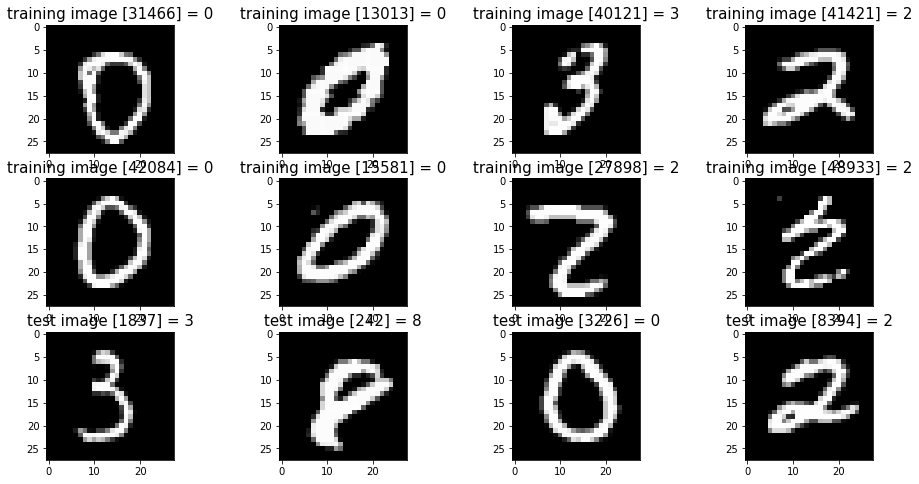

In [3]:
# Part 1A - We will not visualize some of the values. 
# I will plot 4x3 images, because a row of 4 prints well into a pdf. 
# Random images will be plotted -- 8 from Train, and 4 from Test


def show_images(images, title_texts):
    cols = 4
    rows = 3
    plt.figure(figsize=(16,8))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 8):
    r = np.random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 4):
    r = np.random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)


In [4]:
# Part 1B - Create a CNN
# I will now build a CNN with the structure perscribed
# I will use no padding to slowly reduce the number of pixels, to reduce the number of 

mnist_model = keras.models.Sequential([
    Input(shape = (28,28,1), batch_size=128),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv1'),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv2'),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv3'),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv4'),
    Flatten(name='Flatten'),
    Dense(units=512, activation='relu', name='hidden'),
    Dense(units=10, activation='sigmoid', name='output')
])

In [5]:
# print out the Summary to review the structure

mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (128, 26, 26, 32)         320       
                                                                 
 Conv2 (Conv2D)              (128, 24, 24, 32)         9248      
                                                                 
 Conv3 (Conv2D)              (128, 22, 22, 64)         18496     
                                                                 
 Conv4 (Conv2D)              (128, 20, 20, 64)         36928     
                                                                 
 Flatten (Flatten)           (128, 25600)              0         
                                                                 
 hidden (Dense)              (128, 512)                13107712  
                                                                 
 output (Dense)              (128, 10)                 5

In [6]:
# Now build a Compiler

mnist_model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Now fit the model
mnist_history = mnist_model.fit(x_train, y_train, verbose=1, validation_split = 0.2, batch_size=128, epochs=20)

Epoch 1/20
375/375 [==============================] - 19s 21ms/step - loss: 2.0883 - accuracy: 0.9253 - val_loss: 0.0735 - val_accuracy: 0.9769
Epoch 2/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0586 - accuracy: 0.9822 - val_loss: 0.0581 - val_accuracy: 0.9806
Epoch 3/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0304 - accuracy: 0.9912 - val_loss: 0.0557 - val_accuracy: 0.9816
Epoch 4/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.0636 - val_accuracy: 0.9845
Epoch 5/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0155 - accuracy: 0.9959 - val_loss: 0.0965 - val_accuracy: 0.9831
Epoch 6/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.1558 - val_accuracy: 0.9785
Epoch 7/20
375/375 [==============================] - 8s 22ms/step - loss: 0.0092 - accuracy: 0.9980 - val_loss: 0.1142 - val_accuracy: 0.984

In [12]:
# Now plot the training curves
# First I will create a helper function to plot from a dictionary

def plot_curves(history):
  """
  plot_curves: a helper function to plot Training and Loss curves
  Plots the curves with matplotlib in the background, simply plt.show() to show them

  Inputs:
  history (dict): The training history dictionary output from a TF NN's training

  Returns: Nil
  """
  #Set x values as number of epochs - otherwise plot is 0-indexed, skewed Left by 1
  
  x = range(1,len(history.history['loss']) +1) 
  
  plt.figure(figsize=(10,4))
  
  # Prepare first subplot for Losses
  plt.subplot(1,2,1)
  plt.plot(x, history.history['loss'])
  plt.plot(x, history.history['val_loss'])
  plt.title('Loss Curve')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Validation'], loc='best')

  plt.subplot(1,2,2)
  plt.plot(x, history.history['accuracy'])
  plt.plot(x, history.history['val_accuracy'])
  plt.title('Accuracy Curve')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'], loc='best')


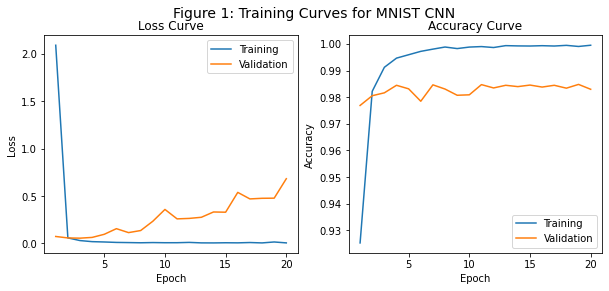

In [40]:
# Now plot the curves:
plot_curves(mnist_history)

plt.suptitle("Figure 1: Training Curves for MNIST CNN", fontsize=14)
plt.show()

The steady growth of Validation Loss, combined with the relative lack of improvement in Validaiton Accuracy, tells us that the model is overfitting - and from quite early on. It is also failing to converge, telling us the optimizer needs some improvement. None the less, accuracy remains very high, mostly over 98%.

I will finish by making and plotting the predictions.

In [16]:
pred = np.array(None)

pred = mnist_model.predict(x_test)


313/313 [==============================] - 1s 3ms/step


In [17]:
mnist_pred = np.empty(len(y_test))

# Now we need to decode the Softmax predictions -- note that I should have use Softmax, but Sigmoid is OK (it will still pick out the most likely)
for i in range(len(y_test)):
  #mnist_pred = np.append(mnist_pred, 
  mnist_pred[i] = np.argmax(pred[i]) # pick out the row-wise max arg

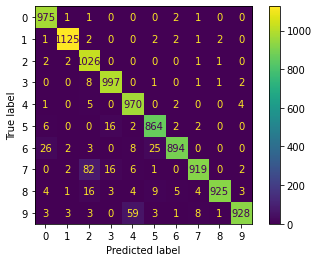

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, mnist_pred)

In [19]:
#Check the accuracy of the model

from sklearn.metrics import accuracy_score
accuracy_score(y_test, mnist_pred)

0.9623

We have a test accuracy of 0.9788, which is somewhat lower than the training and validation accuracies of over 98% (relatively speaking, since training accuracies were commonly over 99%). In particular, there are difficulties with predicting too many Twos and Fives. Using features to help with generalization, like max pooling and dropout layers, would help improve this.

## Part 2: CIFAR-10 Classifiers

We will continue with building classifiers for the CIFAR-10 data set. This is a set of 50,000 32x32 pixel images (in RGB format), with an additional 10,000 images for testing. There are 10 image classes.

We'll begin by importing the data, and plotting the first 9 images.

In [20]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [21]:
# Define a dictionary to help us decode the labels
decoder = {0:'airplane',
           1:'automobile',
           2:'bird',
           3:'cat',
           4:'deer',
           5:'dog',
           6:'frog',
           7:'horse',
           8:'ship',
           9:'truck'}

<Figure size 648x648 with 0 Axes>

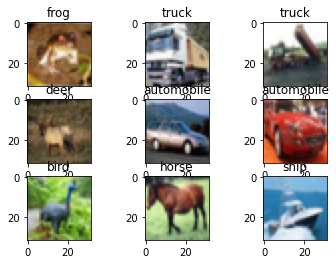

In [22]:
# Plot the first 9 images
plt.figure(figsize=(9,9))
plt.subplots(3,3)
for i in range(9):
  plt.subplot(3,3, 1+i)
  plt.imshow(x_train[i])
  plt.title(decoder[int(y_train[i])])


In [23]:
# Now let's rescale the Image data by dividing by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

In [24]:
# Part 2B: Build the CNN, with Image Augmentation
# Re-use the augmentation layers from Assignment 1

zoomer = tf.keras.layers.RandomZoom(
    height_factor=(-0.2, 0.2),
    width_factor=(-0.2, 0.2),
    fill_mode='nearest',
    seed=1031
)

flipper = tf.keras.layers.RandomFlip(
    mode='horizontal',
    seed=1031
)

# I can't find a Shear replacement on short notice. There doesn't appear to be a simple Layer that does Shearing.
# I will sub in Rotation
rotater = tf.keras.layers.RandomRotation(
    factor = (-0.2, 0.2),
    fill_mode='nearest',
    seed=1031
)

In [25]:
# Build the model
cifar10_model = keras.models.Sequential([
    Input(shape=(32,32,3), batch_size=64),
    zoomer,
    flipper,
    rotater,
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv1'),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv2'),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv3'),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv4'),
    Flatten(name='Flatten'),
    Dense(units=512, activation='relu', name='Hidden1'),
    Dense(units=256, activation='relu', name='Hidden2'),
    Dense(units=10, activation='sigmoid', name='Output')

])

In [26]:
# Print the model's architectural summary

cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_zoom (RandomZoom)    (64, 32, 32, 3)           0         
                                                                 
 random_flip (RandomFlip)    (64, 32, 32, 3)           0         
                                                                 
 random_rotation (RandomRota  (64, 32, 32, 3)          0         
 tion)                                                           
                                                                 
 Conv1 (Conv2D)              (64, 30, 30, 32)          896       
                                                                 
 Conv2 (Conv2D)              (64, 28, 28, 32)          9248      
                                                                 
 Conv3 (Conv2D)              (64, 26, 26, 64)          18496     
                                                      

In [27]:
# Compile the model using SGD
lr_sched = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.005,
    decay_rate = 1e-06,
    decay_steps = 100000,
    staircase=True
)

cifar10_model.compile(
    optimizer=keras.optimizers.SGD(
        learning_rate = lr_sched,
        momentum=0.9
        ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
# Fit the model!
simple_cifar10_history = cifar10_model.fit(
    x_train, y_train, 
    validation_split = 0.2,
    batch_size=64,
    epochs=10, # Using 10 epochs based on feedback in Slack
    verbose = 1
)

Epoch 1/10
625/625 [==============================] - 41s 64ms/step - loss: 1.9147 - accuracy: 0.3004 - val_loss: 1.7189 - val_accuracy: 0.3806
Epoch 2/10
625/625 [==============================] - 31s 49ms/step - loss: 1.6739 - accuracy: 0.3988 - val_loss: 1.5368 - val_accuracy: 0.4509
Epoch 3/10
625/625 [==============================] - 30s 48ms/step - loss: 1.5715 - accuracy: 0.4395 - val_loss: 1.5224 - val_accuracy: 0.4601
Epoch 4/10
625/625 [==============================] - 31s 49ms/step - loss: 1.4943 - accuracy: 0.4646 - val_loss: 1.4185 - val_accuracy: 0.4934
Epoch 5/10
625/625 [==============================] - 30s 49ms/step - loss: 1.4428 - accuracy: 0.4858 - val_loss: 1.3529 - val_accuracy: 0.5139
Epoch 6/10
625/625 [==============================] - 29s 47ms/step - loss: 1.3865 - accuracy: 0.5047 - val_loss: 1.3728 - val_accuracy: 0.5148
Epoch 7/10
625/625 [==============================] - 32s 52ms/step - loss: 1.3533 - accuracy: 0.5192 - val_loss: 1.3312 - val_accuracy:

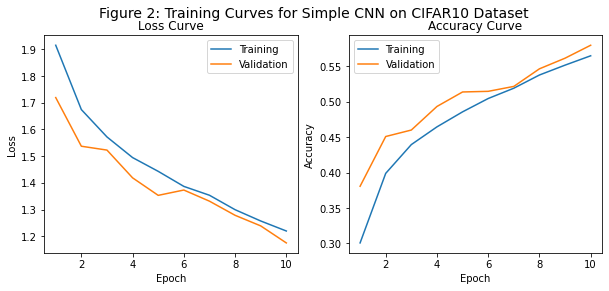

In [39]:
plot_curves(simple_cifar10_history)

plt.suptitle("Figure 2: Training Curves for Simple CNN on CIFAR10 Dataset", fontsize=14)
plt.show()

The model takes a long time to train - this is due to the many more operations being performed due to image augmentation. The accuracy is also limited to around 50%. Further, we could add features to help the model generalize, such as dropout and max pooling.

For Part 2C, we will build a new model with several of those improvements. I will also implement an early stopping callback, to give better control over the number of epochs: training will stop when the callback is satisfied.

In [30]:
# Part 2C: building a better model
better_cifar10_model = keras.models.Sequential([
    Input(shape=(32,32,3), batch_size=64),
    zoomer,
    flipper,
    rotater,
    
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv1'),
    Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv2'),
    MaxPooling2D((2,2), name='MaxPool1'),
    #Dropout(0.3, name='Dropout1'),
    
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv3'),
    Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='Conv4'),
    MaxPooling2D((2,2), name='MaxPool2'),
    #Dropout(0.3, name='Dropout2'),
    
    Flatten(name='Flatten'),
    Dense(units=512, activation='relu', name='Hidden1'),
    Dropout(0.3, name='Dropout'),
    Dense(units=256, activation='relu', name='Hidden2'),
    Dense(units=10, activation='sigmoid', name='Output')

])

In [31]:
# Print out the model summary

better_cifar10_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_zoom (RandomZoom)    (64, 32, 32, 3)           0         
                                                                 
 random_flip (RandomFlip)    (64, 32, 32, 3)           0         
                                                                 
 random_rotation (RandomRota  (64, 32, 32, 3)          0         
 tion)                                                           
                                                                 
 Conv1 (Conv2D)              (64, 30, 30, 32)          896       
                                                                 
 Conv2 (Conv2D)              (64, 28, 28, 32)          9248      
                                                                 
 MaxPool1 (MaxPooling2D)     (64, 14, 14, 32)          0         
                                                      

In [32]:
#Compile the model
better_cifar10_model.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'
)

In [33]:
# Build our Early Stopping Callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta = 0.03,
    patience=4 # Wait 4 more epochs after the minimum, to see if there is any further improvement
)

In [34]:
# Fit the model
better_cifar10_history = better_cifar10_model.fit(x_train, y_train,
                                   validation_split = 0.2,
                                   batch_size = 64,
                                   verbose=1,
                                   epochs=100,
                                   callbacks=[early_stopping])

Epoch 1/100
625/625 [==============================] - 31s 48ms/step - loss: 1.8063 - accuracy: 0.3372 - val_loss: 1.5723 - val_accuracy: 0.4277
Epoch 2/100
625/625 [==============================] - 26s 41ms/step - loss: 1.5695 - accuracy: 0.4331 - val_loss: 1.4407 - val_accuracy: 0.4827
Epoch 3/100
625/625 [==============================] - 26s 42ms/step - loss: 1.4563 - accuracy: 0.4779 - val_loss: 1.4878 - val_accuracy: 0.4807
Epoch 4/100
625/625 [==============================] - 25s 40ms/step - loss: 1.3534 - accuracy: 0.5136 - val_loss: 1.2854 - val_accuracy: 0.5515
Epoch 5/100
625/625 [==============================] - 28s 44ms/step - loss: 1.2899 - accuracy: 0.5411 - val_loss: 1.2797 - val_accuracy: 0.5468
Epoch 6/100
625/625 [==============================] - 25s 39ms/step - loss: 1.2471 - accuracy: 0.5567 - val_loss: 1.2171 - val_accuracy: 0.5737
Epoch 7/100
625/625 [==============================] - 26s 41ms/step - loss: 1.2027 - accuracy: 0.5749 - val_loss: 1.1221 - val_ac

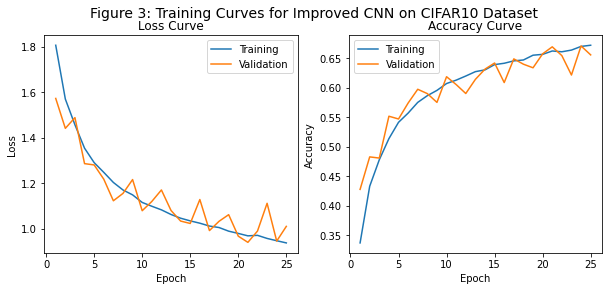

In [38]:
plot_curves(better_cifar10_history)

plt.suptitle("Figure 3: Training Curves for Improved CNN on CIFAR10 Dataset", fontsize=14)

plt.show()

We can observe significant improvements -- both loss and accuracy continue to see improvements. However, the Validation loss begins to see fluctuations. This tells us that the Adam optimizer is indeed much better at converging than SGD, but it may be going too aggressively in later epochs - it is jumping past minima due to a too-high learning rate. Fine tuning with a lower learning rate should help reduce those fluctuations (or scheduling in a lower learning rate, say after 5-10 epochs).

Our best validation loss is at epoch 21, which triggers the early stopping as no further improvements are observed. Accuracy is around 66%.

I originally tried with dropout layers after the Max Pooling as well -- now commented out. There were more severe fluctuations with them, and stopping occured earlier, around 10 epochs and 50% accuracy. Interestingly, the accuracy at that stage is similar, but due to the fluctuations the early stopping was triggered earlier. We could take away that with too much dropout, it is easy for the model to miss key improvements.

Lastly, let's move on to the transfer learning models. I will aim to build models using ResNet50V2 and MobileNetV2.


In [41]:
# Part 2D - Transfer Learning

# Import the desired datasets
from keras.applications import ResNet50V2, MobileNetV2


In [42]:
# Build a Res Net model
res_net = ResNet50V2(weights='imagenet',
                     include_top=False,
                     input_shape = (32,32,3),
                     pooling = 'max',
                     classes=10
                     )

94668760/94668760 [==============================] - 1s 0us/step


In [43]:
# Build a Mobile Net model
mob_net = MobileNetV2(weights='imagenet',
                      include_top=False,
                      input_shape = (32,32,3),
                      pooling='max',
                      classes=10
                      )

9406464/9406464 [==============================] - 0s 0us/step


In [44]:
# Build an Image Augmenter
# This makes it simpler to build a large model in blocks: Augmenter, then Transfered Model, then Prediciton Head

augmenter = tf.keras.Sequential([
    zoomer,
    flipper,
    rotater
])

In [55]:
def create_model(pre_trained_model, num_class):
  """
  create_model: a helper function to put all the layers we want together

  Cuts the layer off at Last_Layer
  Freezes the layer weights in the model
  Adds the required Prediction Head layers

  Inputs:
    pre_trained_model (Keras Model): a pre trained model for transfer learning

    num_class (int): the number of classes to build into the output layer
  
  Returns: the Model, ready for compiling and training

  Note: We still need image augmentation to help with training the Prediction Head
  """

  #Freeze the layers
  for L in pre_trained_model.layers:
    L.trainable = False
  
  #Initialize the expanded Model
  inputs = Input(shape=(32,32,3))
  augmented = augmenter(inputs)

  x = pre_trained_model(augmented, training=False)

  x = Flatten()(x)
  x = Dense(units=512, activation='relu')(x)
  x = Dropout(0.25)(x)
  x = Dense(units=256, activation='relu')(x)
  x = Dense(units=128, activation='relu')(x)
  #x = Dropout(0.25)(x)
  output = Dense(units=num_class, activation='sigmoid', name='Output')(x)

  model = keras.Model(inputs=inputs, outputs=output)

  return model


In [59]:
mob_net_model = create_model(mob_net, 10)

In [60]:
mob_net_model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [61]:
# Train the Mobile Net
mob_history = mob_net_model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
625/625 [==============================] - 36s 53ms/step - loss: 2.0657 - accuracy: 0.2386 - val_loss: 2.0320 - val_accuracy: 0.2539
Epoch 2/15
625/625 [==============================] - 29s 47ms/step - loss: 2.0022 - accuracy: 0.2652 - val_loss: 1.9847 - val_accuracy: 0.2771
Epoch 3/15
625/625 [==============================] - 28s 45ms/step - loss: 1.9936 - accuracy: 0.2646 - val_loss: 1.9671 - val_accuracy: 0.2791
Epoch 4/15
625/625 [==============================] - 30s 47ms/step - loss: 1.9849 - accuracy: 0.2706 - val_loss: 1.9503 - val_accuracy: 0.2920
Epoch 5/15
625/625 [==============================] - 28s 46ms/step - loss: 1.9695 - accuracy: 0.2762 - val_loss: 1.9330 - val_accuracy: 0.2920
Epoch 6/15
625/625 [==============================] - 29s 46ms/step - loss: 1.9691 - accuracy: 0.2796 - val_loss: 1.9438 - val_accuracy: 0.2908
Epoch 7/15
625/625 [==============================] - 30s 47ms/step - loss: 1.9569 - accuracy: 0.2850 - val_loss: 1.9311 - val_accuracy:

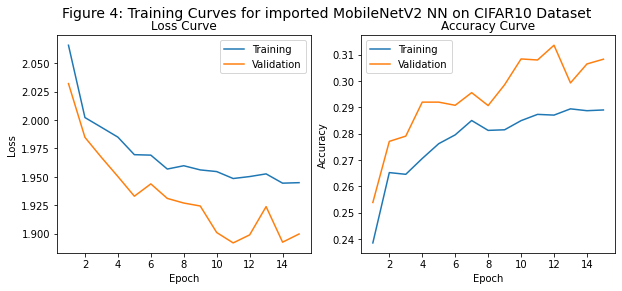

In [62]:
# Now plot the training curves
plot_curves(mob_history)

plt.suptitle("Figure 4: Training Curves for imported MobileNetV2 NN on CIFAR10 Dataset", fontsize=14)
plt.show()


The MobileNetV2 model is not generalizing well to th3 CIFAR-10 dataset application, with accuracy stuck around 30 and little gains observed. Validation results are actually better than the training, which makes me think the training may not be effective. It may be that the prediction head is either too complex, or not complex enough.

In [63]:
res_net_model = create_model(res_net, 10)

In [64]:
res_net_model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [65]:
# Train the ResNet50V2-based model
res_net_history = res_net_model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
625/625 [==============================] - 40s 58ms/step - loss: 2.0315 - accuracy: 0.2623 - val_loss: 1.9261 - val_accuracy: 0.3140
Epoch 2/15
625/625 [==============================] - 34s 54ms/step - loss: 1.9392 - accuracy: 0.3002 - val_loss: 1.8969 - val_accuracy: 0.3297
Epoch 3/15
625/625 [==============================] - 40s 63ms/step - loss: 1.9150 - accuracy: 0.3125 - val_loss: 1.8796 - val_accuracy: 0.3278
Epoch 4/15
625/625 [==============================] - 38s 61ms/step - loss: 1.8974 - accuracy: 0.3157 - val_loss: 1.8710 - val_accuracy: 0.3354
Epoch 5/15
625/625 [==============================] - 35s 56ms/step - loss: 1.8864 - accuracy: 0.3234 - val_loss: 1.8415 - val_accuracy: 0.3475
Epoch 6/15
625/625 [==============================] - 34s 54ms/step - loss: 1.8736 - accuracy: 0.3266 - val_loss: 1.8248 - val_accuracy: 0.3553
Epoch 7/15
625/625 [==============================] - 35s 56ms/step - loss: 1.8700 - accuracy: 0.3322 - val_loss: 1.8433 - val_accuracy:

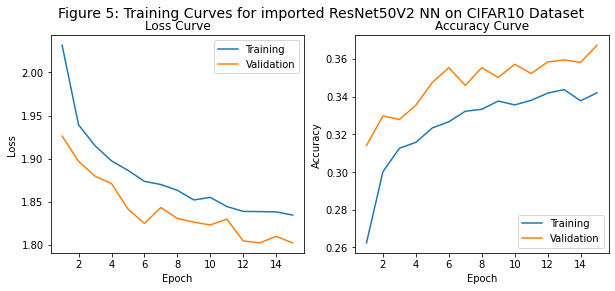

In [66]:
# Now plot the training curves
plot_curves(res_net_history)

plt.suptitle("Figure 5: Training Curves for imported ResNet50V2 NN on CIFAR10 Dataset", fontsize=14)
plt.show()

Similarly, the RexNet50V2 model is not performing well on the CIFAR-10 data. Once again we are seeing relatively low accuracy, around 36% at the 15th epoch. It is possible that many more epochs may yield results, but the slow process makes that seem unlikely - the initial epoch yielded 31% accuracy, so gains have been quite slow.

Again, it could be that the prediction head added is not correct for the model. Another possibility is there is some implementation error I have repeated, but after checking several times I'm not sure. The last possibility is that these models simply do not transfer/generalize well to the CIFAR-10 use case.

The 66% accuracy from the improved basic CNN is still the best result.